In [8]:
import numpy as np
import ClusterMergers
import matplotlib.pyplot as plt

## Initiate class

In [2]:
model = ClusterMergers.BaseModel()

## Read individual fits file
Use this function to load an image from SZ and X-ray fits file, if needed

In [3]:
X = model.read_fits(folder_loc='example_folder', resize=True)

#### SZ channel

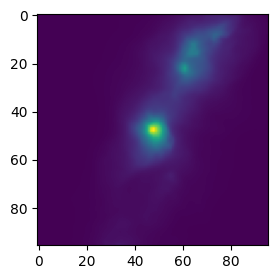

In [4]:
fig = plt.figure(figsize=[3,3])
plt.imshow(X[0,:,:,0])
plt.show()

#### X-ray channel

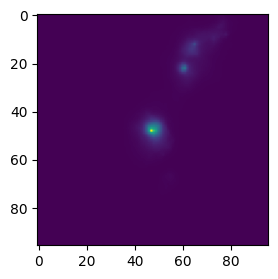

In [5]:
fig = plt.figure(figsize=[3,3])
plt.imshow(X[0,:,:,1])
plt.show()

## Make prediction

In [6]:
preds = model.predict_merger_prob(X, normalise=True)

1/1 [==============================] - 0s 226ms/step


In [7]:
preds

array([[0.84477395]], dtype=float32)

The model predicted that the cluster is merging with a probability of 84%.